In [60]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import neighbors, linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, LeaveOneOut, KFold
from sklearn.metrics import classification_report, mean_squared_error
import numpy as np

1.

a)

In [39]:
data = pd.read_csv('strongdrink.txt')

In [40]:
data

,cultivar,alco,malic,ash,alk,magn,tot_phen,flav,nonfl_phen,proanth,color_int,hue,OD280rat,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
172,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
173,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
174,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [41]:
df = data
d1 = data['cultivar'] == 1
d1 = d1.replace(True, 1)
d1 = d1.replace(False, 0)
df['cul1'] = d1

d2 = data['cultivar'] == 2
d2 = d2.replace(True, 1)
d2 = d2.replace(False, 0)
df['cul2'] = d2

In [43]:
X1 = df.iloc[:, [1, 2, 6, 10]]
y1 = df.iloc[:, -2]
X2 = df.iloc[:, [1, 2, 6, 10]]
y2 = df.iloc[:, -1]

$j=1$

In [58]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.25, random_state=20)

LogReg1 = LogisticRegression(C=1e8)
LogReg1.fit(X1_train, y1_train)
print(LogReg1.intercept_)
print(LogReg1.coef_)

[-69.68116013]
[[ 5.14337883 -0.57240394  2.56973423 -0.72993724]]


In [59]:
y1_pred = LogReg1.predict(X1_test)
print(classification_report(y1_test, y1_pred))
print('MSE1: ', mean_squared_error(y1_test, y1_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.90      0.93        31
         1.0       0.80      0.92      0.86        13

    accuracy                           0.91        44
   macro avg       0.88      0.91      0.90        44
weighted avg       0.92      0.91      0.91        44

MSE1:  0.09090909090909091


$j=2$

In [52]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.25, random_state=20)

LogReg2 = LogisticRegression(C=1e8)
LogReg2.fit(X2_train, y2_train)
print(LogReg2.intercept_)
print(LogReg2.coef_)

[52.65532025]
[[-3.78208825 -0.48217466  1.37368047 -1.46591821]]


In [61]:
y2_pred = LogReg2.predict(X2_test)
print(classification_report(y2_test, y2_pred))
print('MSE2: ', mean_squared_error(y2_test, y2_pred))

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96        23
         1.0       1.00      0.90      0.95        21

    accuracy                           0.95        44
   macro avg       0.96      0.95      0.95        44
weighted avg       0.96      0.95      0.95        44

MSE2:  0.045454545454545456


In [57]:
print('num_obs1: ', d1.sum(), 'num_obs2: ', d2.sum())

num_obs1:  59.0 num_obs2:  71.0


We can see that the category $j=2$ has the higher accuracy and smaller error rate. It also has the smaller MSE. And it is the one with more observations.

b)

$j=1$

In [76]:
X1vars = df.iloc[:, [1, 2, 6, 10]].values
y1vars = df.iloc[:, -2].values
N1_loo = X1vars.shape[0]
loo1 = LeaveOneOut()
loo1.get_n_splits(X1vars)
MSE1_vec = np.zeros(N1_loo)

match = 0
for train_index, test_index in loo1.split(X1vars):
    X1_train, X1_test = X1vars[train_index], X1vars[test_index]
    #print(len(X1_train), len(X1_test))
    y1_train, y1_test = y1vars[train_index], y1vars[test_index]
    LogReg = LogisticRegression(max_iter=200)
    LogReg.fit(X1_train, y1_train)
    y1_pred = LogReg.predict(X1_test)
    MSE1_vec[test_index] = (y1_test - y1_pred) ** 2
    if (y1_test - y1_pred) ** 2 == 0:
        match += 1
    #print(classification_report(y1_test, y1_pred))
    #print('MSE for test set', test_index, ' is', MSE1_vec[test_index])

MSE1_loo = MSE1_vec.mean()
MSE1_loo_std = MSE1_vec.std()
print('match: ', match, ', precision: ', match / 176)
print('test estimate MSE loocv=', MSE1_loo, ', test estimate MSE standard err=', MSE1_loo_std)

match:  159 , precision:  0.9034090909090909
test estimate MSE loocv= 0.09659090909090909 , test estimate MSE standard err= 0.2953999075353627


$j=2$

In [77]:
X2vars = df.iloc[:, [1, 2, 6, 10]].values
y2vars = df.iloc[:, -1].values
N2_loo = X2vars.shape[0]
loo2 = LeaveOneOut()
loo2.get_n_splits(X2vars)
MSE2_vec = np.zeros(N2_loo)

match = 0
for train_index, test_index in loo2.split(X2vars):
    X2_train, X2_test = X2vars[train_index], X2vars[test_index]
    y2_train, y2_test = y2vars[train_index], y2vars[test_index]
    LogReg = LogisticRegression(max_iter=200)
    LogReg.fit(X2_train, y2_train)
    y2_pred = LogReg.predict(X2_test)
    MSE2_vec[test_index] = (y2_test - y2_pred) ** 2
    if (y2_test - y2_pred) ** 2 == 0:
        match += 1

MSE2_loo = MSE2_vec.mean()
MSE2_loo_std = MSE2_vec.std()
print('match: ', match, ', precision: ', match / 176)
print('test estimate MSE loocv=', MSE2_loo, ', test estimate MSE standard err=', MSE2_loo_std)

match:  161 , precision:  0.9147727272727273
test estimate MSE loocv= 0.08522727272727272 , test estimate MSE standard err= 0.27921959943876395


c)

$j=1$

In [78]:
k = 4
kf = KFold(n_splits=k, random_state=10, shuffle=True)
kf.get_n_splits(X1vars)

MSE1_vec_kf = np.zeros(k)

k_ind = int(0)
for train_index, test_index in kf.split(X1vars):
    # print("TRAIN:", train_index, "TEST:", test_index)
    # print('k index=', k_ind)
    X1_train, X1_test = X1vars[train_index], X1vars[test_index]
    y1_train, y1_test = y1vars[train_index], y1vars[test_index]
    LogReg = LogisticRegression(max_iter=300)
    LogReg.fit(X1_train, y1_train)
    y1_pred = LogReg.predict(X1_test)
    MSE1_vec_kf[k_ind] = ((y1_test - y1_pred) ** 2).mean()
    print(classification_report(y1_test, y1_pred))
    # print('MSE for test set', k_ind, ' is', MSE_vec_kf[k_ind])
    k_ind += 1

MSE1_kf = MSE1_vec_kf.mean()
MSE1_kf_std = MSE1_vec_kf.std()
print('test estimate MSE k-fold=', MSE1_kf, 'test estimate MSE standard err=', MSE1_kf_std)

              precision    recall  f1-score   support

         0.0       0.97      0.91      0.94        32
         1.0       0.79      0.92      0.85        12

    accuracy                           0.91        44
   macro avg       0.88      0.91      0.89        44
weighted avg       0.92      0.91      0.91        44

              precision    recall  f1-score   support

         0.0       0.79      1.00      0.89        27
         1.0       1.00      0.59      0.74        17

    accuracy                           0.84        44
   macro avg       0.90      0.79      0.81        44
weighted avg       0.87      0.84      0.83        44

              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97        29
         1.0       0.93      0.93      0.93        15

    accuracy                           0.95        44
   macro avg       0.95      0.95      0.95        44
weighted avg       0.95      0.95      0.95        44

              preci

$j=2$

In [79]:
k = 4
kf = KFold(n_splits=k, random_state=10, shuffle=True)
kf.get_n_splits(X2vars)

MSE2_vec_kf = np.zeros(k)

k_ind = int(0)
for train_index, test_index in kf.split(X1vars):
    # print("TRAIN:", train_index, "TEST:", test_index)
    # print('k index=', k_ind)
    X2_train, X2_test = X2vars[train_index], X2vars[test_index]
    y2_train, y2_test = y2vars[train_index], y2vars[test_index]
    LogReg = LogisticRegression(max_iter=300)
    LogReg.fit(X2_train, y2_train)
    y2_pred = LogReg.predict(X2_test)
    MSE2_vec_kf[k_ind] = ((y2_test - y2_pred) ** 2).mean()
    print(classification_report(y2_test, y2_pred))
    # print('MSE for test set', k_ind, ' is', MSE_vec_kf[k_ind])
    k_ind += 1

MSE2_kf = MSE2_vec_kf.mean()
MSE2_kf_std = MSE2_vec_kf.std()
print('test estimate MSE k-fold=', MSE2_kf, 'test estimate MSE standard err=', MSE2_kf_std)

              precision    recall  f1-score   support

         0.0       0.76      0.95      0.84        20
         1.0       0.95      0.75      0.84        24

    accuracy                           0.84        44
   macro avg       0.85      0.85      0.84        44
weighted avg       0.86      0.84      0.84        44

              precision    recall  f1-score   support

         0.0       1.00      0.85      0.92        33
         1.0       0.69      1.00      0.81        11

    accuracy                           0.89        44
   macro avg       0.84      0.92      0.87        44
weighted avg       0.92      0.89      0.89        44

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98        28
         1.0       1.00      0.94      0.97        16

    accuracy                           0.98        44
   macro avg       0.98      0.97      0.98        44
weighted avg       0.98      0.98      0.98        44

              preci

2.

a)

In [87]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
%matplotlib notebook

# Hard code input births data by age group
# Add two zeros on the end of each vector
# Age bins are 9, 10, 10-14, 15-17, 18-19, 20-24, 25-29, 30-34, 35-39,
# 40-44, 45-49, 55, 56. First two and last two are not data

cool_data = pd.read_csv('CoolIndex.txt', header=None)

In [90]:
cool_data.columns = ['age', 'cool']

<IPython.core.display.Javascript object>


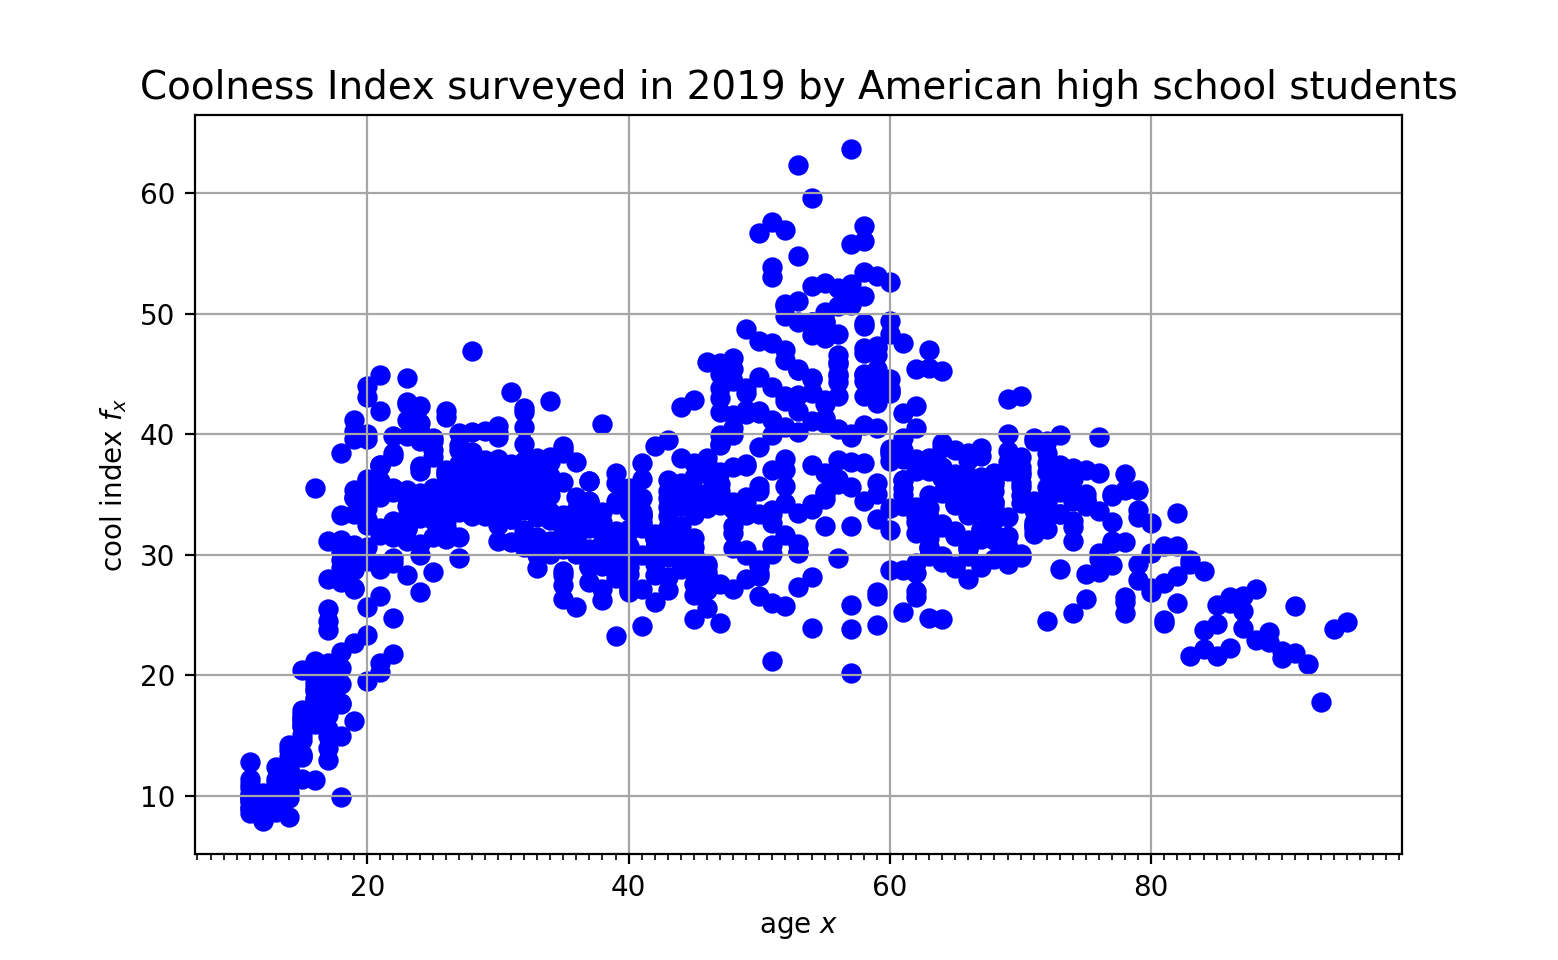

Text(0, 0.5, 'cool index $f_{x}$')

In [95]:
x = cool_data['age']
y = cool_data['cool']

fig, ax = plt.subplots()
plt.scatter(x, y, s=40, c='blue', marker='o',
            label='CoolIndex')

minorLocator = MultipleLocator(1)
ax.xaxis.set_minor_locator(minorLocator)
plt.grid(b=True, which='major', color='0.65', linestyle='-')
plt.title('Coolness Index surveyed in 2019 by American high school students', fontsize=14)
plt.xlabel(r'age $x$')
plt.ylabel(r'cool index $f_{x}$')

In [91]:
cool_data

,age,cool
0,11.0,10.981602
1,11.0,11.364925
2,11.0,10.190227
3,11.0,9.903725
4,11.0,8.997918
...,...,...
951,91.0,21.872584
952,92.0,20.898071
953,93.0,17.756216
954,94.0,23.857727


b)

In [105]:
c_df = cool_data

n1 = (c_df['age'] >= 11) & (c_df['age'] < 22)
n1 = n1.replace(True, 1)
n1 = n1.replace(False, 0)
c_df['bin1'] = n1
n2 = (c_df['age'] >= 22) & (c_df['age'] < 40)
n2 = n2.replace(True, 1)
n2 = n2.replace(False, 0)
c_df['bin2'] = n2
n3 = (c_df['age'] >= 40) & (c_df['age'] < 59)
n3 = n3.replace(True, 1)
n3 = n3.replace(False, 0)
c_df['bin3'] = n3
n4 = (c_df['age'] >= 59) & (c_df['age'] < 77)
n4 = n4.replace(True, 1)
n4 = n4.replace(False, 0)
c_df['bin4'] = n4
n5 = (c_df['age'] >= 77) & (c_df['age'] < 95)
n5 = n5.replace(True, 1)
n5 = n5.replace(False, 0)
c_df['bin5'] = n5

In [106]:
c_df

,age,cool,bin1,bin2,bin3,bin4,bin5
0,11.0,10.981602,1.0,0.0,0.0,0.0,0.0
1,11.0,11.364925,1.0,0.0,0.0,0.0,0.0
2,11.0,10.190227,1.0,0.0,0.0,0.0,0.0
3,11.0,9.903725,1.0,0.0,0.0,0.0,0.0
4,11.0,8.997918,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
951,91.0,21.872584,0.0,0.0,0.0,0.0,1.0
952,92.0,20.898071,0.0,0.0,0.0,0.0,1.0
953,93.0,17.756216,0.0,0.0,0.0,0.0,1.0
954,94.0,23.857727,0.0,0.0,0.0,0.0,1.0


In [109]:
import statsmodels.api as sm


c_df['const'] = 1
ols1 = sm.OLS(endog=c_df.iloc[:, 1], exog=c_df.iloc[:, 2:], missing='drop')
ols_res = ols1.fit()
print(ols_res.summary())

                            OLS Regression Results                            
Dep. Variable:                   cool   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.426
Method:                 Least Squares   F-statistic:                     142.8
Date:                Tue, 25 Feb 2020   Prob (F-statistic):          4.89e-113
Time:                        00:32:21   Log-Likelihood:                -3214.4
No. Observations:                 956   AIC:                             6441.
Df Residuals:                     950   BIC:                             6470.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
bin1          -4.3455      7.027     -0.618      0.5

In [111]:
y_bar1 = ols_res.predict(exog=c_df.iloc[:, 2:])

<IPython.core.display.Javascript object>


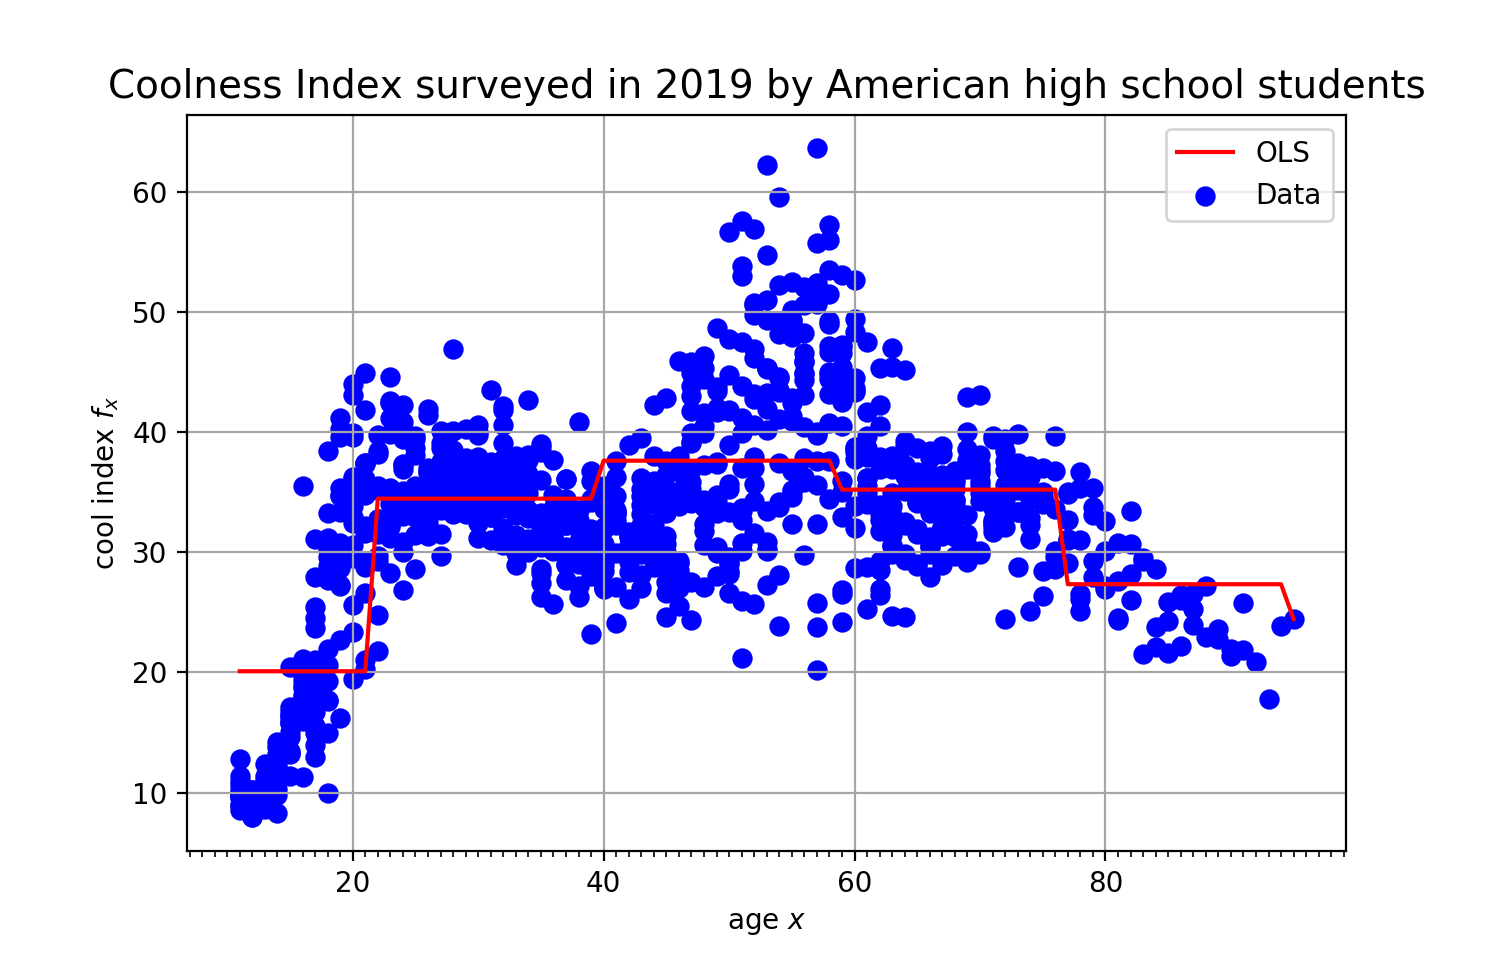

In [115]:
x = cool_data['age']
y = cool_data['cool']

fig, ax = plt.subplots()
plt.scatter(x, y, s=40, c='blue', marker='o', label='Data')
plt.plot(x, y_bar1, c='red', label='OLS')

minorLocator = MultipleLocator(1)
ax.xaxis.set_minor_locator(minorLocator)
plt.grid(b=True, which='major', color='0.65', linestyle='-')
plt.title('Coolness Index surveyed in 2019 by American high school students', fontsize=14)
plt.xlabel(r'age $x$')
plt.ylabel(r'cool index $f_{x}$')
plt.legend(loc='upper right')

In [117]:
ols_res.predict(exog=[0, 0, 0, 1, 0, 1])

array([35.22540004])

predicted coolness of a 73 year-old is about 35.

c)

<IPython.core.display.Javascript object>


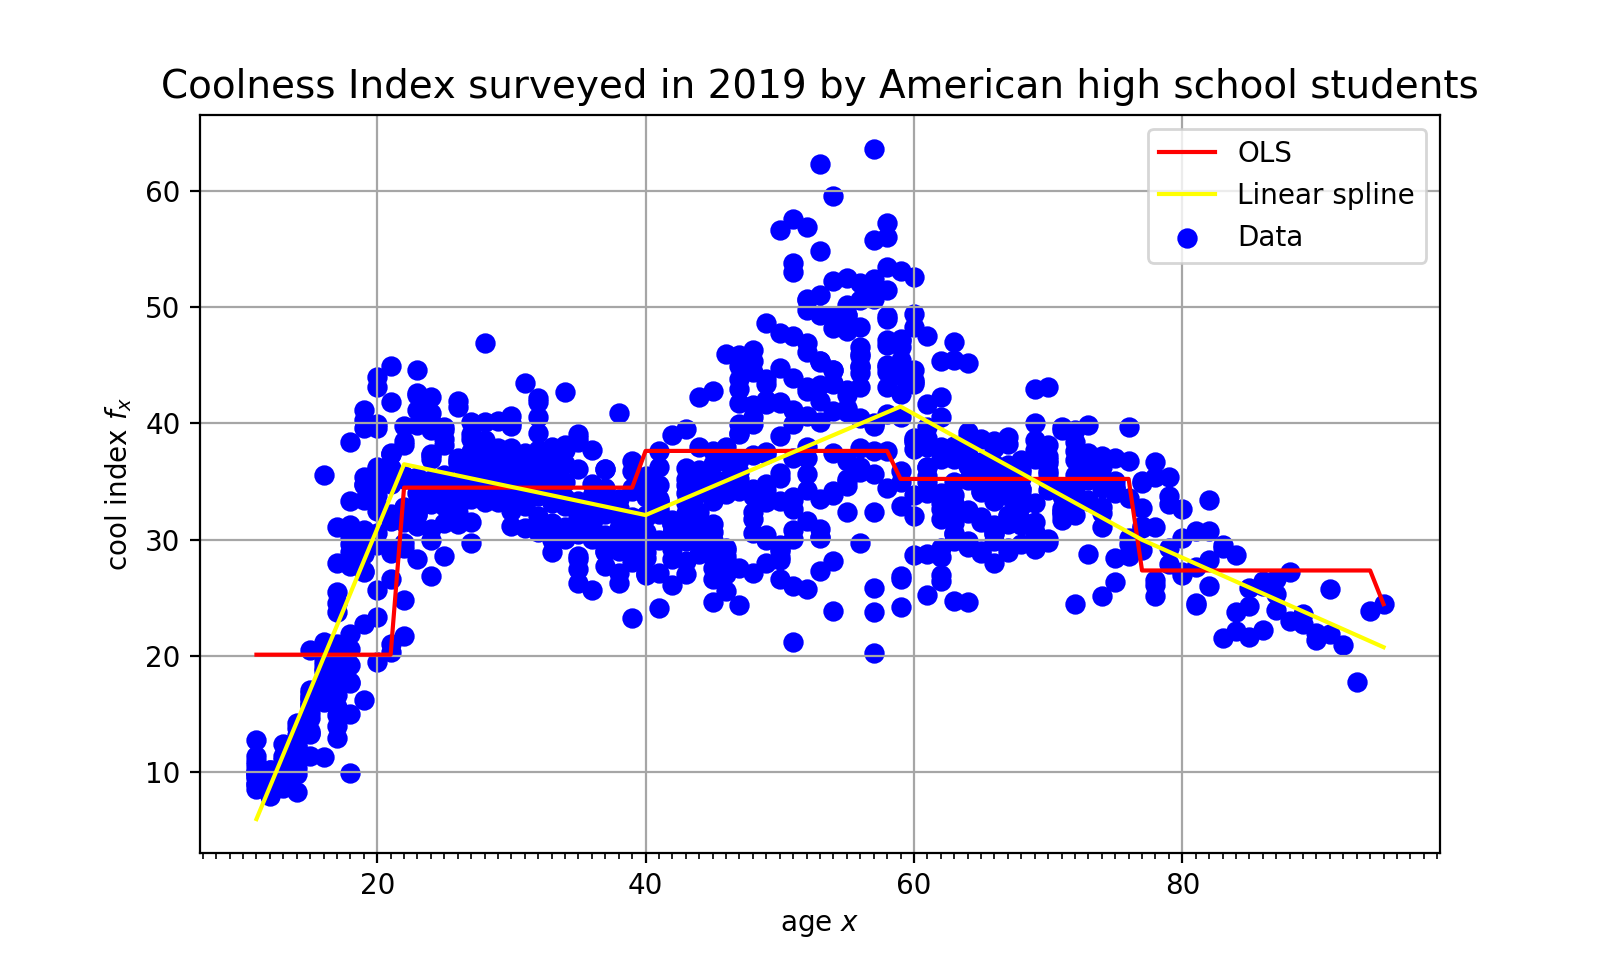

In [132]:
from scipy.interpolate import LSQUnivariateSpline as lsq 

t = [22, 40, 59, 77]
lin_spl = lsq(x.to_numpy(), y.to_numpy(), t, k=1)
y_bar2 = lin_spl(x.to_numpy())

fig, ax = plt.subplots()
plt.scatter(x, y, s=40, c='blue', marker='o', label='Data')
plt.plot(x, y_bar1, c='red', label='OLS')
plt.plot(x, y_bar2, c='yellow', label='Linear spline')

minorLocator = MultipleLocator(1)
ax.xaxis.set_minor_locator(minorLocator)
plt.grid(b=True, which='major', color='0.65', linestyle='-')
plt.title('Coolness Index surveyed in 2019 by American high school students', fontsize=14)
plt.xlabel(r'age $x$')
plt.ylabel(r'cool index $f_{x}$')
plt.legend(loc='upper right')

In [133]:
lin_spl(73)

array(32.53683239)

The linear spline predicts the coolness of a 73 year-old to be about 32.5.

d)

<IPython.core.display.Javascript object>


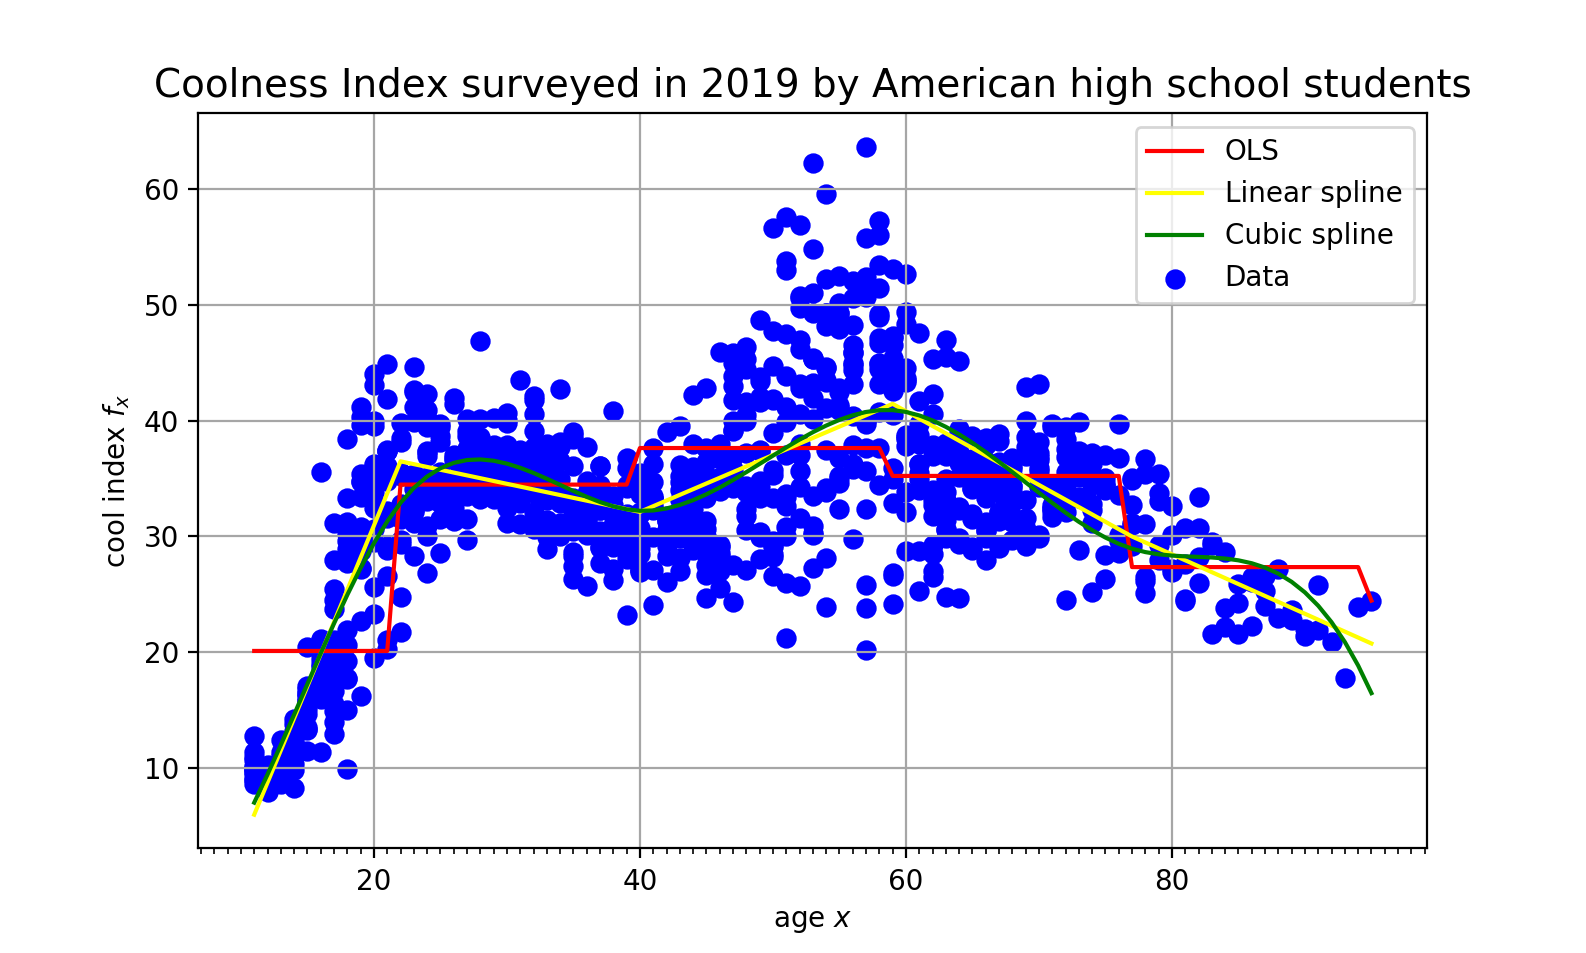

In [134]:
t = [22, 40, 59, 77]
lin_spl = lsq(x.to_numpy(), y.to_numpy(), t, k=1)
y_bar2 = lin_spl(x.to_numpy())

cu_spl = lsq(x.to_numpy(), y.to_numpy(), t)
y_bar3 = cu_spl(x.to_numpy())

fig, ax = plt.subplots()
plt.scatter(x, y, s=40, c='blue', marker='o', label='Data')
plt.plot(x, y_bar1, c='red', label='OLS')
plt.plot(x, y_bar2, c='yellow', label='Linear spline')
plt.plot(x, y_bar3, c='green', label='Cubic spline')

minorLocator = MultipleLocator(1)
ax.xaxis.set_minor_locator(minorLocator)
plt.grid(b=True, which='major', color='0.65', linestyle='-')
plt.title('Coolness Index surveyed in 2019 by American high school students', fontsize=14)
plt.xlabel(r'age $x$')
plt.ylabel(r'cool index $f_{x}$')
plt.legend(loc='upper right')

In [135]:
cu_spl(73)

array(31.26242939)

The cubic spline predicts the coolness of a 73 year-old to be about 31.